# Insights on Los Angeles' 311 data for 2020 service requests

Michael Gonzalez

This notebook will outline the exploration of Los Angeles' 311 data. By looking at the closed status of each requests with the created and serviced dates. The data will be loaded into dataframes and pandas with the datetime libraries. The plots will be created from the seaborn and matplotlib libraries. I will be using the numpy library for additonal parts of this project. 

## Brief Overview 

I will need to import useful libraries to timestamp and profile data to discover insights. This project benefited from looking for insights in the closing rate of the open requests. The data is orgainzed and has many useful columns to experiment with new ideas. The focus of this project is on NC 52, which is listed as Downtown Los Angeles. This area is the center of the city.

In [1]:
# Importing needed libraries.
import pandas as pd
import numpy as np
import pandas_profiling
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Loading the data into a Data Frame.
dfb = pd.read_csv('..\Documents\MyLA311_Service_Request_Data_2020.csv')

# Displaying the top five rows of data.
dfb.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1523593381,01/01/2020 12:02:00 AM,01/07/2020 12:19:00 PM,SR Created,BOS,Illegal Dumping Pickup,Closed,Call,BOS,NaN,...,"(33.988984265, -118.302681205)",673,J,5.0,South Los Angeles APC,8.0,Marqueece Harris-Dawson,81.0,EMPOWERMENT CONGRESS CENTRAL AREA NDC,77TH STREET
1,1-1523590121,01/01/2020 12:05:00 AM,01/02/2020 08:43:00 AM,SR Created,BOS,Illegal Dumping Pickup,Closed,Call,BOS,NaN,...,"(34.1940284578, -118.499471638)",531,D,6.0,South Valley APC,6.0,Nury Martinez,19.0,LAKE BALBOA NC,WEST VALLEY
2,1-1523596201,01/01/2020 12:16:00 AM,01/02/2020 03:13:00 PM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,Android,...,"(34.0117235893, -118.312764174)",673,H,2.0,South Los Angeles APC,8.0,Marqueece Harris-Dawson,77.0,EMPOWERMENT CONGRESS NORTH AREA NDC,SOUTHWEST
3,1-1523596222,01/01/2020 12:19:00 AM,01/03/2020 07:02:00 AM,SR Created,BOS,Bulky Items,Closed,Mobile App,Self Service,Android,...,"(34.0724397675, -118.287797874)",634,A,1.0,Central APC,13.0,Mitch O'Farrell,53.0,RAMPART VILLAGE NC,OLYMPIC
4,1-1523591123,01/01/2020 12:21:00 AM,01/03/2020 03:54:00 PM,SR Created,BOS,Metal/Household Appliances,Closed,Mobile App,Self Service,Android,...,"(34.0724397675, -118.287797874)",634,A,1.0,Central APC,13.0,Mitch O'Farrell,53.0,RAMPART VILLAGE NC,OLYMPIC


## Exploratory Data Analysis

In this section, I had seen a project that demonstrated the use of timestamp to measure time. Creating new variables that represents the CreatedDate, ClosedDate, and ServiceDate columns for a description of the data.

In [2]:
# Creating a new variable that represents the listed columns with timestamp information.
dfb['CreatedDate'] = pd.to_datetime(dfb['CreatedDate'], errors = 'coerce')
dfb['ClosedDate'] = pd.to_datetime(dfb['ClosedDate'], errors = 'coerce')
dfb['ServiceDate'] = pd.to_datetime(dfb['ServiceDate'], errors = 'coerce')

In [3]:
# Continuing the previous step.
dfb['closed_created'] = dfb.ClosedDate - dfb.CreatedDate
dfb['service_created'] = dfb.ServiceDate - dfb.CreatedDate

In [4]:
dfb.closed_created.describe()

count                    1484526
mean      4 days 20:28:08.875965
std      17 days 07:21:42.497620
min         -3653 days +01:33:17
25%       0 days 18:55:28.250000
50%              1 days 22:18:09
75%       4 days 18:16:04.500000
max            520 days 15:35:43
Name: closed_created, dtype: object

As you can see in the min section of the description. There are negative numbers, which means that it has errors in it. Now it is time to check for other types of measures.

In [5]:
# Checking the data for the sum of null values.
dfb.closed_created.isna().sum()

7247

In [6]:
# Checking the shape of the data.
dfb.shape

(1491773, 36)

In [7]:
# Checking the min ratio of a new column that has a closed status.
dfb['closed_createdD'] = dfb.closed_created / pd.Timedelta(days = 1)
dfbD = dfb[(dfb.closed_createdD > (1.0 / 24.0)) & (dfb.Status == 'Closed') & (dfb.NC == 52)][['closed_createdD', 'RequestType']]
dfbD.closed_createdD.min()

0.04170138888888889

There is a minimum of 4% of open requests in Downtown Los Angeles that has a closed status. This low completion rate was during a global pandenmic with the city being shutdown.

In [8]:
# Comparing the averages of request types with the new column closed_createdD.
dfbDavg = dfbD.groupby(['RequestType']).agg(['mean', 'std']).reset_index().sort_values(by = ['RequestType'])
dfbDavg

RequestType closed_createdD           
                                          mean        std
0                  Bulky Items       12.457651  37.291334
1          Dead Animal Removal        0.911565   2.487656
2             Electronic Waste        4.148285   2.780719
3                     Feedback        6.696198  10.262497
4             Graffiti Removal       13.427307  39.376542
5          Homeless Encampment       75.316659  91.725289
6       Illegal Dumping Pickup       26.731988  60.837321
7   Metal/Household Appliances        5.494361  16.786445
8   Multiple Streetlight Issue       72.290215  69.940955
9                        Other        1.959386   1.739633
10    Single Streetlight Issue       63.202632  68.818841

In [9]:
# Compairing the request type, closed_createdD with the color values.
dfbDavg['colorvals'] = sns.color_palette('colorblind', 11)
dfbDavg

RequestType closed_createdD             \
                                          mean        std   
0                  Bulky Items       12.457651  37.291334   
1          Dead Animal Removal        0.911565   2.487656   
2             Electronic Waste        4.148285   2.780719   
3                     Feedback        6.696198  10.262497   
4             Graffiti Removal       13.427307  39.376542   
5          Homeless Encampment       75.316659  91.725289   
6       Illegal Dumping Pickup       26.731988  60.837321   
7   Metal/Household Appliances        5.494361  16.786445   
8   Multiple Streetlight Issue       72.290215  69.940955   
9                        Other        1.959386   1.739633   
10    Single Streetlight Issue       63.202632  68.818841   

                                            colorvals  
                                                       
0   (0.00392156862745098, 0.45098039215686275, 0.6...  
1   (0.8705882352941177, 0.5607843137254902, 0.019...  
2   (0.00784313725490196, 0.6196078431372549, 0.45...  
3       (0.8352941176470589, 0.3686274509803922, 0.0)  
4      (0.8, 0.47058823529411764, 0.7372549019607844)  
5   (0.792156862745098, 0.5686274509803921, 0.3803...  
6   (0.984313725490196, 0.6862745098039216, 0.8941...  
7   (0.5803921568627451, 0.5803921568627451, 0.580...  
8       (0.9254901960784314, 0.8823529411764706, 0.2)  
9   (0.33725490196078434, 0.7058823529411765, 0.91...  
10  (0.00392156862745098, 0.45098039215686275, 0.6...

## Data Visualizations 

In this next section of the notebook. I will talk about the visualization of my results. This will include a comparison of different request types in the Downtown Los Angeles area. The visualizations will display the completion rate of requests related to graffiti removal with other popular requests.

Text(0.5, 1.0, 'The completion time for graffiti removal requests')

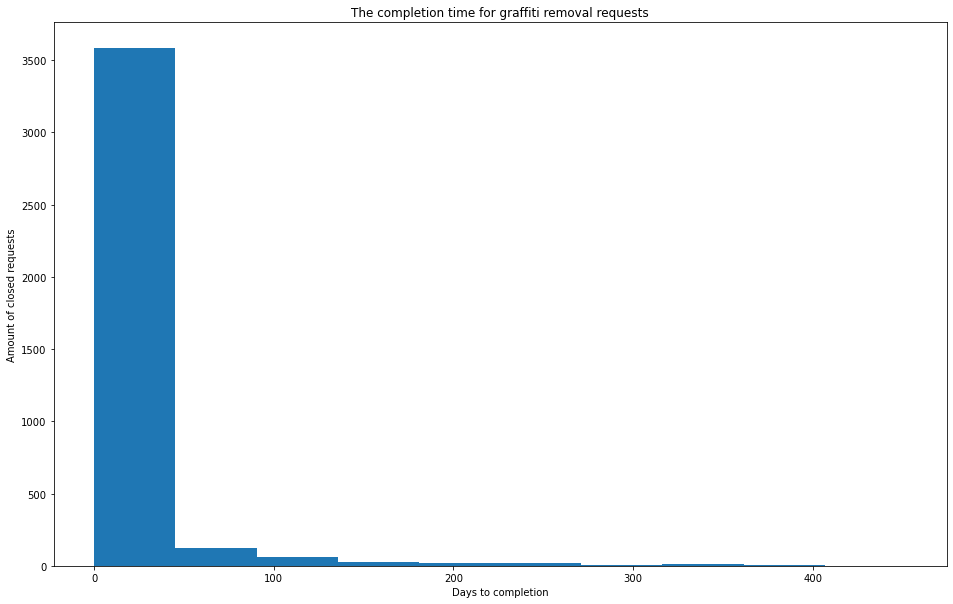

In [10]:
# Plotting a histogram based on the graffiti removal request type's closed date.
plt.figure(figsize = (16, 10))
dfbD[(dfbD.RequestType == 'Graffiti Removal')].closed_createdD.plot.hist(bins = 10)
plt.xlabel('Days to completion')
plt.ylabel('Amount of closed requests')
plt.title("The completion time for graffiti removal requests")

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Days to Completion'),
 Text(0.5, 1.0, 'The most completed requests in Downtown Los Angeles')]

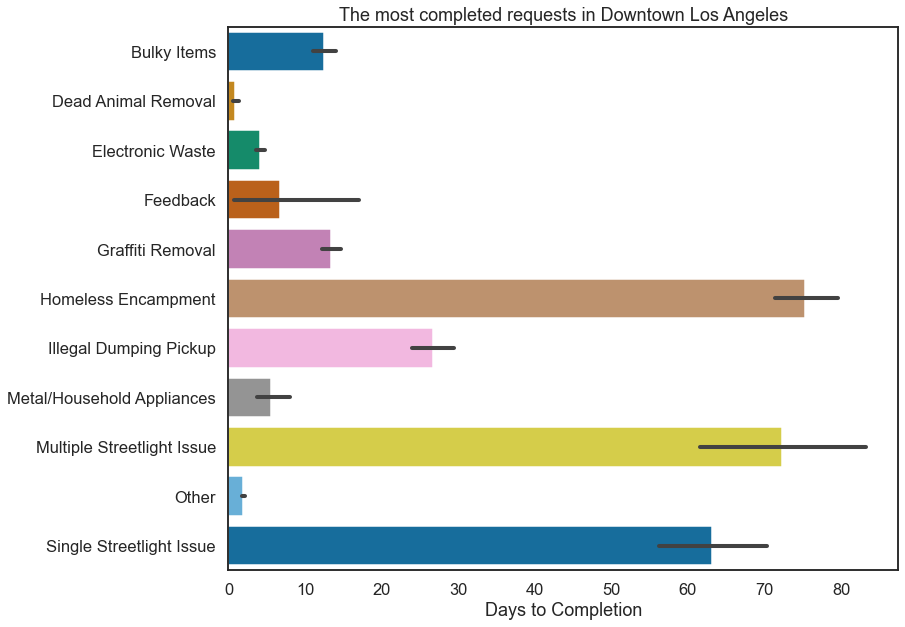

In [11]:
# Plotting a stacked bar chart of camparing the completion time of graffiti removal with other requests.
plt.figure(figsize=(12,10))
sns.set_style("white")
sns.set_context("talk")
ax = sns.barplot(y = 'RequestType', x = 'closed_createdD', data = dfbD, order = dfbDavg.RequestType, palette = list(dfbDavg.colorvals))
sb = ax.set(xlabel = 'Days to Completion', title = 'The most completed requests in Downtown Los Angeles', ylabel = '')
sb

## Conclusion

In the year 2020, the residents of Downtown Los Angeles requested the services that deals with homeless encampments, single and multiple streetlight issues. This is just a start to see where the city of Los Angeles, could focus on completing other requests.